In [1]:
# Importing the necessary libraries
import math
import numpy                            as np                        # importing numpy library
import pandas                           as pd                        # importing pandas library
import seaborn                          as sns                       # For Data Visualization 
import matplotlib.pyplot                as plt                       # Necessary module for plotting purpose
import warnings                                                      # importing warning library

# add graphs into jupiter notebook
%matplotlib inline                             
warnings.filterwarnings('ignore')                                    # for ignoring warnings in notebook

In [2]:
# loading "2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv" data into sneakerDataOrg df using pandas read_csv function
sneakerDataOrg = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# printing top 5 rows of the loanDataOrg df
sneakerDataOrg.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# printing datatypes of each columns of the dataset
sneakerData = sneakerDataOrg.copy()
print("\033[1m*"*100)
print("a.\nColumn_Names        Data_Types")
print("*"*30)
print("\033[0m{0}\033[1m".format(sneakerData.dtypes))
print("*"*30)
print()

# printing No of Columns having different Types of Datatype

print("*"*100)
print("b.\nNumber of Columns with each DataTypes as follows :")
print("*"*50)
print("Column_Names     No_of_Columns\033[0m")
print("*"*30)
print(sneakerData.dtypes.value_counts())
print("\033[1m*"*30)
print("\033[0m")

# printing Different Column Names of the dataset

print("\033[1m*"*100)
print("c.\nEach Column Names of the dataset")
print("*"*80)
print("\033[0m{0}\033[1m".format(sneakerData.columns))
print("*"*80)
print("\033[0m")

****************************************************************************************************
a.
Column_Names        Data_Types
******************************
order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object
******************************

****************************************************************************************************
b.
Number of Columns with each DataTypes as follows :
**************************************************
Column_Names     No_of_Columns
******************************
int64     5
object    2
dtype: int64
******************************

****************************************************************************************************
c.
Each Column Names of the dataset
********************************************************************************
Index(['order_id', 'shop_id', 'user_id', 'order_amount', '

**As shown in the above, <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a.) There are no missing values<br>and (b.) No duplicate row in the given dataset**

**Question 1: Given some sample data, write a program to answer the following:**

**On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13 . Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.**

**a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

**First lets confirm the data is not having any missing value or duplicate rows in it.**

In [4]:
# checking missing values in dataset for each attributes / columns 

print("\033[1m*"*100)
print("Column_Name       No_of_Missing_Values")
print("*"*50)
print("\033[0m{0}".format(sneakerData.isnull().sum()))
print("\033[1m*"*50)
print()

# checking if any duplicate rows available in the dataset

print("*"*100)
print("Showing Duplicate rows if any in the dataset: ")
print("*"*50)
print("\033[0m{0}".format(sneakerData[sneakerData.duplicated()]))
print("\033[1m*"*100)
print("\033[0m")

****************************************************************************************************
Column_Name       No_of_Missing_Values
**************************************************
order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64
**************************************************

****************************************************************************************************
Showing Duplicate rows if any in the dataset: 
**************************************************
Empty DataFrame
Columns: [order_id, shop_id, user_id, order_amount, total_items, payment_method, created_at]
Index: []
****************************************************************************************************



**Now as per naive calculation AOV given above:**

In [5]:
print(f"[INFO] Number of sneakers shops :{sneakerData['shop_id'].nunique()}")
print(f"[INFO] Average order value (AOV) of thee sneaker shops is {round(sneakerData['order_amount'].sum()/len(sneakerData), 2)}")

[INFO] Number of sneakers shops :100
[INFO] Average order value (AOV) of thee sneaker shops is 3145.13


**Lets describe the data to check for any insights:**

In [6]:
# Five point summary of each attribute
sneakerData.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


**From the above we can clearly see that there are some extreme outliers are present in "order_amount".<br>
Lets find out the outliers:**

In [7]:
def showOutliers(pdData):
    colNames = []
    meanOut = []
    medianOut = []
    lowerQ = []
    upperQ = []
    iqrOut = []
    noOfOutLiers = []
    perOfOutliers = []
    valOutliers = []
    # looping through all numeric datatype columns
    for feature in (pdData.select_dtypes(include=np.number).columns.tolist()):
        Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
        Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
        IQR = Q3 - Q1                             # evaluating Inter Quartile Range i.e IQR
        '''
        finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
        extreme outliers (Upper quartile + 1.5 times IQR)
        '''
        outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]
        if(outliers.shape[0] != 0):
            
            colNames.append(feature)
            meanOut.append(round(np.mean(pdData[feature]),3))
            medianOut.append(round(np.median(pdData[feature]),3))
            lowerQ.append(Q1)
            upperQ.append(Q3)
            iqrOut.append(round(IQR,3))
            noOfOutLiers.append(outliers.shape[0])
            perOfOutliers.append(str(round(((outliers.shape[0]/pdData[feature].shape[0])*100),3))+" %")
            valOutliers.append(sorted(outliers.tolist()))
            
            plt.figure(figsize=(15,3))                # setting figure size with width = 15 and height = 3
            print("*"*30)
            print("\033[1mBoxplot of {0} column : \033[0m".format(feature))
            print("*"*30)
            ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature
            plt.pause(0.005)
            # printing mean, median and IQR for the feature
            print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
                  .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
                 )
            # printing No of outliers, percentage of the data points that are outliers and the values of the outliers
            print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
            .format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
            print("*"*125)
        else:
            colNames.append(feature)
            meanOut.append(round(np.mean(pdData[feature]),3))
            medianOut.append(round(np.median(pdData[feature]),3))
            lowerQ.append(Q1)
            upperQ.append(Q3)
            iqrOut.append(round(IQR,3))
            noOfOutLiers.append(outliers.shape[0])
            perOfOutliers.append(str(round(((outliers.shape[0]/pdData[feature].shape[0])*100),3))+" %")
            valOutliers.append(sorted(outliers.tolist()))
    if(len(colNames) == 0):
        print("There are \033[1mno outliers\033[0m present in Dataset.")
    else:
        data = [colNames, meanOut, medianOut, lowerQ, upperQ, iqrOut, noOfOutLiers, perOfOutliers, valOutliers]
        outliersPd = pd.DataFrame(data,index=['Column Name', 'Mean', 'Median', 'Lower Quartile', 'Upper Quartile', 'IQR', 'No of Outliers Present', 'Percentage of Outliers', 'Values of Outliers'])
        pd.set_option('display.max_colwidth',-1)
        return outliersPd.T

******************************
Boxplot of order_amount column : 
******************************


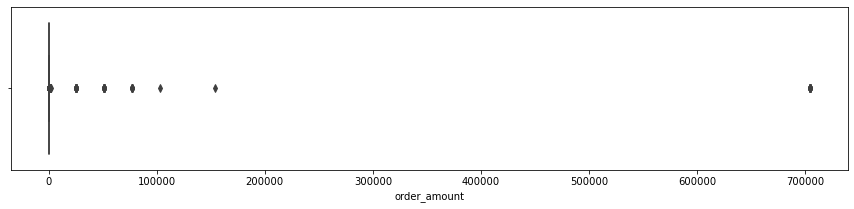

Feature order_amount : Mean = 3145.128, Median = 284.0 and Inter-Quartile-Range (IQR) = 227.0
There are 141 outliers (2.82 % of the data points) in order_amount feature and the values are [704000, 704000, 780, 765, 25725, 780, 765, 780, 780, 51450, 51450, 51450, 704000, 830, 51450, 748, 154350, 772, 804, 815, 885, 1056, 784, 25725, 704000, 815, 885, 25725, 25725, 935, 77175, 704000, 1760, 1408, 25725, 25725, 704000, 25725, 1408, 765, 736, 51450, 704000, 960, 704000, 800, 804, 800, 865, 745, 830, 880, 920, 765, 774, 790, 784, 704000, 25725, 704000, 948, 845, 760, 745, 51450, 102900, 965, 51450, 51450, 25725, 935, 77175, 780, 77175, 805, 25725, 51450, 51450, 704000, 77175, 25725, 830, 704000, 1056, 890, 980, 25725, 51450, 760, 25725, 51450, 748, 786, 704000, 77175, 736, 805, 25725, 1056, 736, 935, 1086, 736, 51450, 77175, 25725, 816, 810, 740, 25725, 704000, 51450, 1064, 77175, 780, 51450, 51450, 77175, 735, 25725, 760, 880, 780, 748, 748, 25725, 748, 800, 704000, 780, 77175, 960, 704000

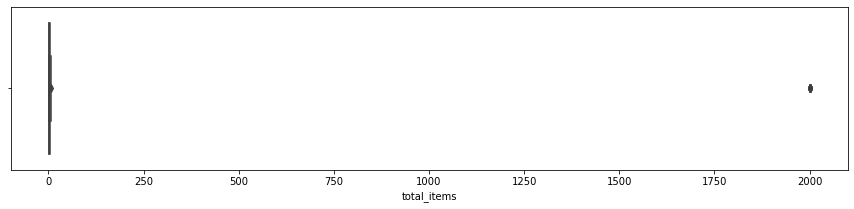

Feature total_items : Mean = 8.787, Median = 2.0 and Inter-Quartile-Range (IQR) = 2.0
There are 18 outliers (0.36 % of the data points) in total_items feature and the values are [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 8, 2000, 2000, 2000]
*****************************************************************************************************************************


,Column Name,Mean,Median,Lower Quartile,Upper Quartile,IQR,No of Outliers Present,Percentage of Outliers,Values of Outliers
0,order_id,2500.5,2500.5,1250.75,3750.25,2499.5,0,0.0 %,[]
1,shop_id,50.079,50.0,24.0,75.0,51.0,0,0.0 %,[]
2,user_id,849.092,849.0,775.0,925.0,150.0,0,0.0 %,[]
3,order_amount,3145.128,284.0,163.0,390.0,227.0,141,2.82 %,"[735, 736, 736, 736, 736, 740, 745, 745, 748, 748, 748, 748, 748, 760, 760, 760, 760, 765, 765, 765, 765, 765, 772, 772, 774, 780, 780, 780, 780, 780, 780, 780, 780, 784, 784, 786, 790, 790, 800, 800, 800, 804, 804, 805, 805, 810, 815, 815, 816, 830, 830, 830, 845, 865, 865, 880, 880, 880, 885, 885, 890, 920, 935, 935, 935, 948, 960, 960, 965, 980, 1056, 1056, 1056, 1064, 1086, 1408, 1408, 1760, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 51450, 51450, 51450, ...]"
4,total_items,8.787,2.0,1.0,3.0,2.0,18,0.36 %,"[8, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]"


In [8]:
showOutliers(sneakerData)

**As we can observe from the above:**
* **Two columns namely 'order_amount' and 'total_items' are having outliers present.**
* **Attribute 'order_amount' having most of the outliers, about 2.82% of the dataset and 'total_items' with 0.36%.**

**Let's check skewness of the dataset:**

In [9]:
# checking skewness of the data
sneakerData.skew().sort_values(ascending=False)

total_items     17.065556
order_amount    16.675033
shop_id         0.013830 
order_id        0.000000 
user_id        -0.034052 
dtype: float64

**Now lets analyize 'total_items' attribute:**

In [10]:
def catPlot(x,data,kind,size=(5,5),y=None,hue=None,column=None,order=None,hue_order = None, rotation=False):
    '''
    Use to plot seaborn catplot with proper annotation
    
    Parameters
    ----------
    x, y, hue : names of variables in ``data``
        Inputs for plotting long-form data. See examples for interpretation.        
    data : DataFrame
        Long-form (tidy) dataset for plotting. Each column should correspond
        to a variable, and each row should correspond to an observation.
    size : plot figure size (width, height)
    column: col : names of variables in ``data``, optional
    Categorical variables that will determine the faceting of the grid.
    order, hue_order : lists of strings, optional
        Order to plot the categorical levels in, otherwise the levels are
        inferred from the data objects.        
    kind : "bar", or "count".
    rotation : rotate x ticks to 90 degree

    Returns
    -------
    Plot seabron catplot with proper annotation of each bar and also with concerned title of the plot.
    '''
    g = sns.catplot(x=x,y=y,data=data,kind=kind,hue=hue,col=column,order=order,hue_order=hue_order )

    if(hue != None):
        plt.title(f"Distribution of column : '{x}' by {hue}")                       # setting title of the figure
        
    else:
        plt.title(f"Distribution of column : '{x}'")                              # setting title of the figure
        
    g.fig.set_size_inches(size)
    ax = g.facet_axis(0,0)
            
    if(rotation):
        g.set_xticklabels(rotation=90)
    
    for p in ax.patches:
        y = 0 if(math.isnan(p.get_height())) else int(p.get_height())
        ax.annotate(y, (p.get_x()+(p.get_width()/2), p.get_height()), xytext=(0, 10), fontsize=12, color='black',
                    fontweight='bold', ha='center', va='center', textcoords='offset points')
    plt.show()

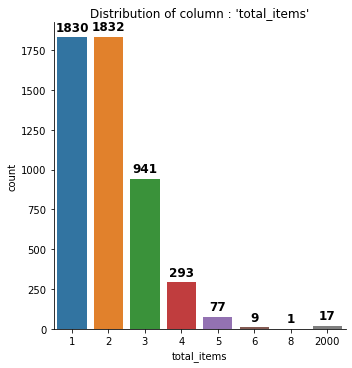

In [11]:
catPlot('total_items', sneakerData, 'count')

**As can be seen from above count plot, there are 17 orders which having 'total_items' of value 2000. Earlier in boxplot also shown the same as outliers in the dataset.<br><br>
In this case, we can calculate the Average Order Value for small and bulk orders separately,
having 2 averages and then take a weighted average to arrive at final AOV. We may also find average value per order per item as a useful
metric for evaluation in this scenario to get the price of single sneaker pair (Revenue per order per item).**<br><br>
**b. What metric would you report for this dataset?**<br><br>
**Out of 5000 orders, only 17 are bulk orders that messes with the AOV values, hence a simple average can't be used as metric.
On further analysis, we find that all these are placed by one customer,user_id 607. Hence we can treat this customer as an outlier,
ignore the value and find AOV for others which would be more close to reality. We also need to take into account that one customer may place multiple orders, hence grouping the orders by user id would also provide interesting results.
We could also find average order value per day (by grouping them on created_by date) and then take the mean over 30 days period.
But this also does not address the problem of bulk order. Hence, a better metric would be to find the average order value per day
(since the question mentions analysis on AOV) and take the mode of it as it will reflect the most common order value.<br><br>
If AOV is not to be considered, mean of amount per item would serve as better metric as it will tell as how much value an order of one item would generate.**

**A better metric would be to find the AOV after treating these outliers, ie, replace outlier values to lower side of 1st quartile with value of 1st quartile and to higher side of 3rd quartile to value on 3rd quartile , so as to have little impact to our data distribtion due to outliers. This is better than ignoring the outliers since the value of outliers is huge and ignoring them would affect the total revenue generated through them. In below steps, we are trying to do so.**

In [12]:
for feature in (sneakerData.select_dtypes(include=np.number).columns.tolist()):
    Q1 = sneakerData[feature].quantile(0.25)        # evaluating lower / first quartile
    Q3 = sneakerData[feature].quantile(0.75)        # evaluating upper / third quartile
    IQR = Q3 - Q1                             # evaluating Inter Quartile Range i.e IQR
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    sneakerData.loc[(sneakerData[feature] < low), feature] = low
    sneakerData.loc[(sneakerData[feature] > high), feature] = high

**Now lets confirm outliers are treated properly.**

In [13]:
showOutliers(sneakerData)

,Column Name,Mean,Median,Lower Quartile,Upper Quartile,IQR,No of Outliers Present,Percentage of Outliers,Values of Outliers
0,order_id,2500.5,2500.5,1250.75,3750.25,2499.5,0,0.0 %,[]
1,shop_id,50.079,50.0,24.0,75.0,51.0,0,0.0 %,[]
2,user_id,849.092,849.0,775.0,925.0,150.0,0,0.0 %,[]
3,order_amount,306.033,284.0,163.0,390.0,227.0,0,0.0 %,[]
4,total_items,2.007,2.0,1.0,3.0,2.0,0,0.0 %,[]


**c. What is its value?**

In [14]:
print(f"[INFO] After treating outliers, Average order value (AOV) of the sneaker shops is {round(sneakerData['order_amount'].sum()/len(sneakerData), 2)}")

[INFO] After treating outliers, Average order value (AOV) of the sneaker shops is 306.03


The above value of $306.03 which seems a fair average of AOV.

**Question 2: For this question you’ll need to use SQL. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**

**a. How many orders were shipped by Speedy Express in total?**

**Ans: 54**<br>
**Query:**

**b. What is the last name of the employee with the most orders?**

**Ans: Peacock**<br>
**Query:**

**c. What product was ordered the most by customers in Germany?**

**Ans: Boston Crab Meat**<br>
**Query:**